- 网络结构的可视化


Point1:可视化网络结构
 - 这里我们使用torchinfo开源工具包，介绍网络可视化结构方案
 - 可视化网络结构需要进行一次前向传播以后的特定的信息

In [17]:
import os
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.models as models
from torchinfo import summary
#os.environ['CUA_VISIBLE_DEVICES']="2"

resnet18 =models.resnet18()#实例化模型
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [19]:
##可视化网络使用重点在于看“output shape"和‘param’
summary(resnet18,(1,3,224,224))#1:batch_size   3:图片的通道数  224:图片的高度

Layer (type:depth-idx)                   Output Shape              Param #
ResNet                                   --                        --
├─Conv2d: 1-1                            [1, 64, 112, 112]         9,408
├─BatchNorm2d: 1-2                       [1, 64, 112, 112]         128
├─ReLU: 1-3                              [1, 64, 112, 112]         --
├─MaxPool2d: 1-4                         [1, 64, 56, 56]           --
├─Sequential: 1-5                        [1, 64, 56, 56]           --
│    └─BasicBlock: 2-1                   [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-1                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-2             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-3                    [1, 64, 56, 56]           --
│    │    └─Conv2d: 3-4                  [1, 64, 56, 56]           36,864
│    │    └─BatchNorm2d: 3-5             [1, 64, 56, 56]           128
│    │    └─ReLU: 3-6                    [1, 64, 56, 56]           --
│

##  point2:可视化CNN

In [20]:
## 首先看下网络中哪些是卷积层，因为只有卷积层才会有卷积核的概念
print(dict(resnet18.named_children()))

{'conv1': Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False), 'bn1': BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True), 'relu': ReLU(inplace=True), 'maxpool': MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False), 'layer1': Sequential(
  (0): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (1): BasicBlock(
    (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (conv2): Conv2d(64, 64, kernel_si

In [26]:
dict(resnet18.named_children())['conv1']

Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)

64 torch.Size([64, 3, 7, 7])


D:\Minicoda3\Minicoda3-4.7.10\envs\gluon\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


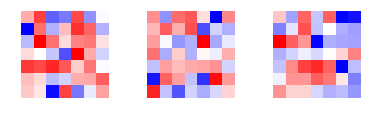

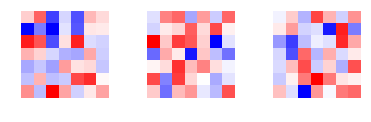

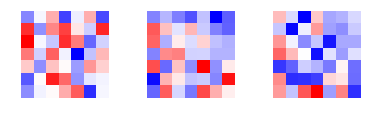

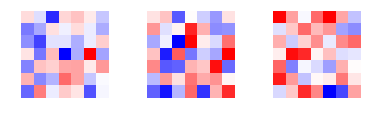

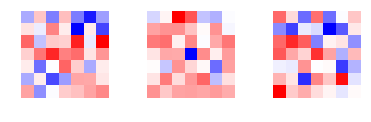

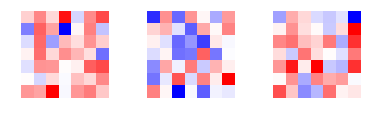

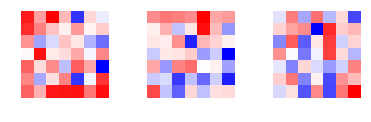

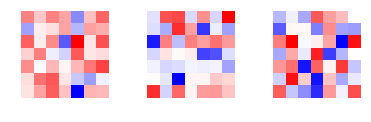

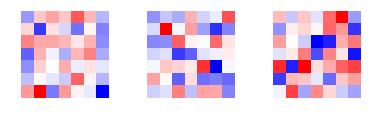

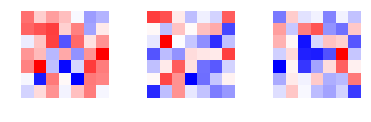

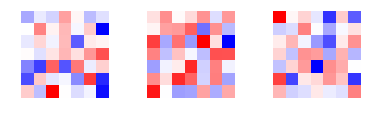

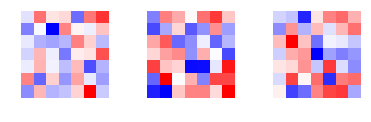

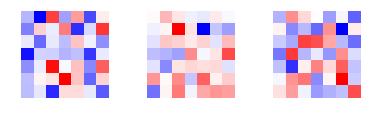

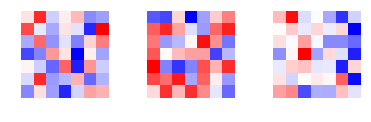

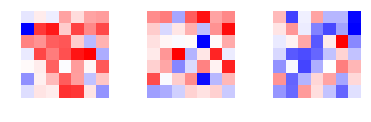

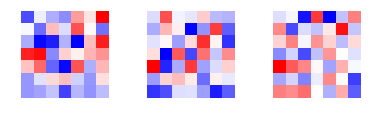

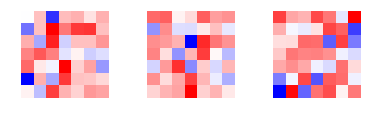

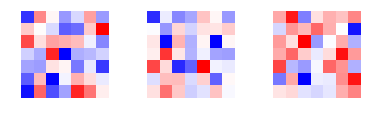

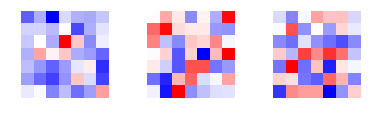

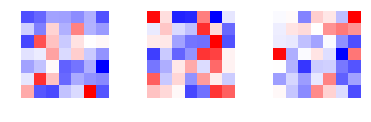

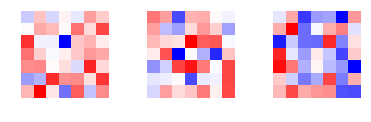

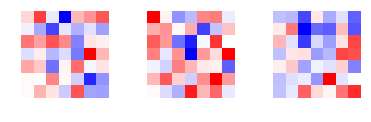

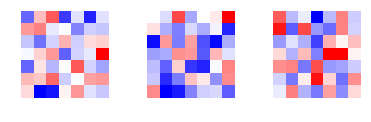

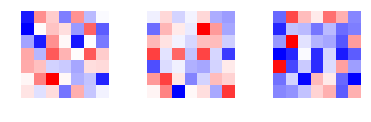

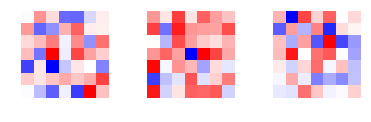

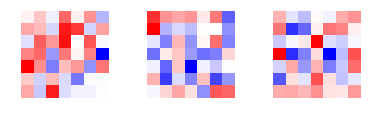

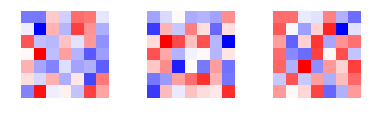

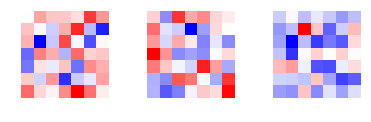

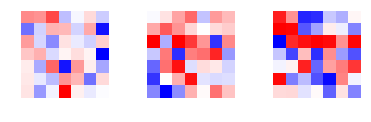

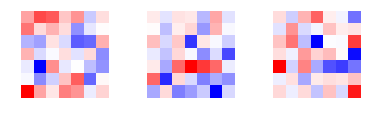

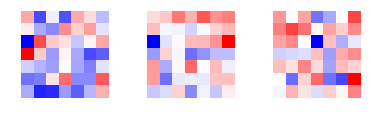

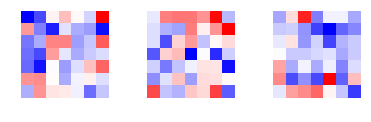

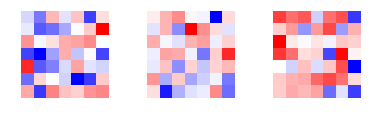

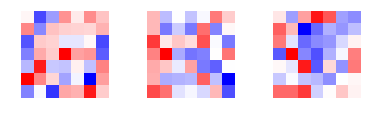

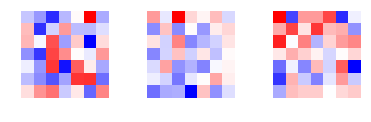

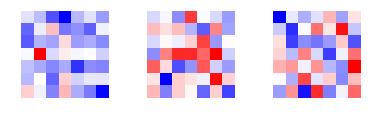

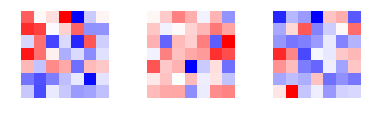

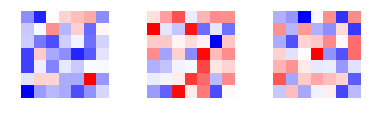

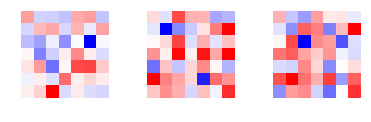

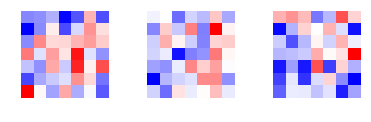

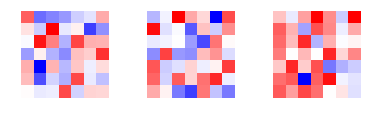

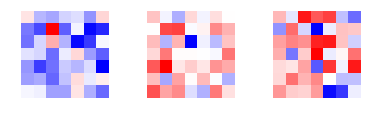

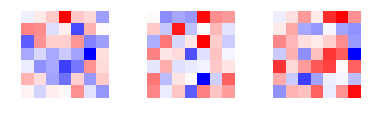

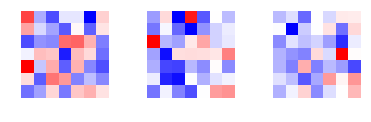

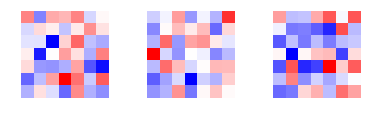

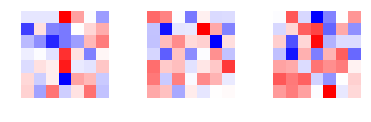

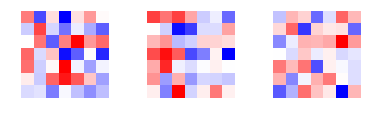

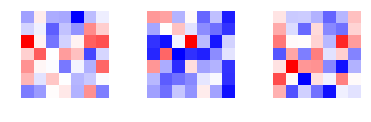

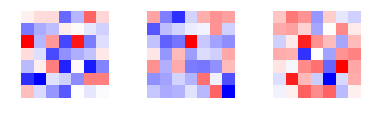

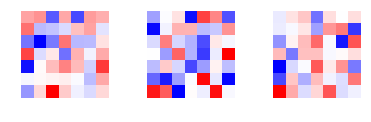

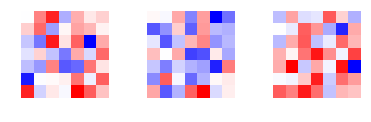

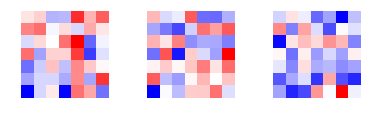

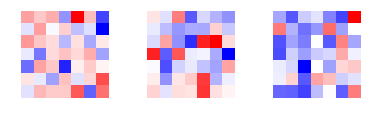

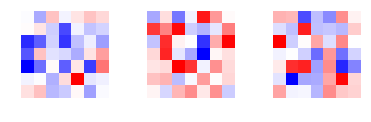

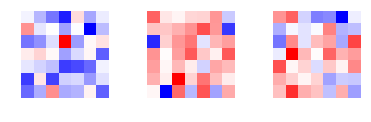

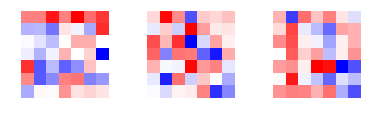

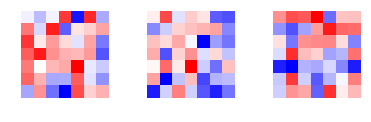

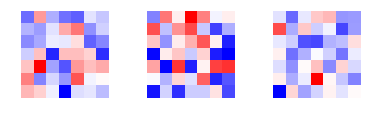

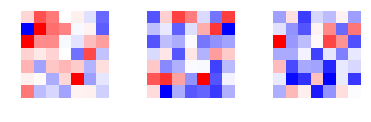

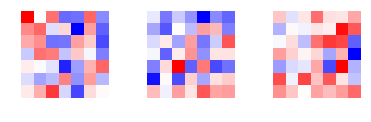

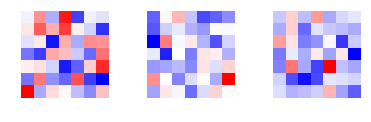

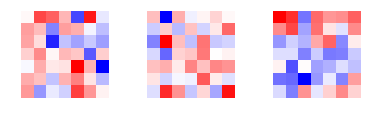

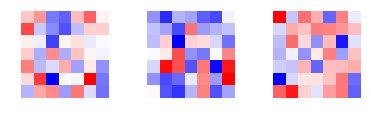

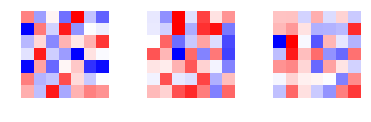

In [36]:
## 我们选择第一个卷积层进行可视化，注意卷积核的参数并没有经过训练仍旧初始化的状态
## 上面显示kernel_size是（7，7），对应于下面图像的大小
conv1=dict(resnet18.named_children())['conv1']
kernel_set=conv1.weight.cpu().detach()
num=len(conv1.weight.cpu().detach())
print(num,kernel_set.shape)
      
for i in range(0,num):
    i_kernel=kernel_set[i]
    plt.figure(figsize=(20,17))
    if (len(i_kernel))>1:
        for idx,filer in enumerate(i_kernel):
            plt.subplot(9,9,idx+1)
            plt.axis('off')
            plt.imshow(filer[ :, :].detach(),cmap='bwr')
        

In [37]:
i_kernel[-1]

tensor([[ 0.0073,  0.0079, -0.0134,  0.0118, -0.0118,  0.0040, -0.0157],
        [ 0.0098,  0.0166,  0.0013, -0.0207, -0.0203, -0.0188,  0.0388],
        [-0.0572,  0.0479, -0.0059, -0.0394,  0.0102, -0.0099, -0.0201],
        [-0.0182,  0.0422,  0.0088,  0.0254, -0.0269, -0.0354,  0.0242],
        [ 0.0177,  0.0203,  0.0036, -0.0357,  0.0144,  0.0011, -0.0139],
        [-0.0065,  0.0042, -0.0014, -0.0024, -0.0053, -0.0307,  0.0189],
        [-0.0174,  0.0266,  0.0015, -0.0154, -0.0267,  0.0219,  0.0363]])

----------------------------------------------------

In [ ]:
import torch
from torchvision.models import vgg11

model = vgg11(pretrained=True)
#print(dict(model.features.named_children()))

In [ ]:
conv1 = dict(model.features.named_children())['3']
kernel_set = conv1.weight.detach()
num = len(conv1.weight.detach())
print(kernel_set.shape)
for i in range(0,num):
    i_kernel = kernel_set[i]
    plt.figure(figsize=(20, 17))
    if (len(i_kernel)) > 1:
        for idx, filer in enumerate(i_kernel):
            plt.subplot(9, 9, idx+1) 
            plt.axis('off')
            plt.imshow(filer[ :, :].detach(),cmap='bwr')

## point3:可视化CNN特征图

In [41]:
class Hook(object):
    def __init__(self):
        self.module_name = []
        self.features_in_hook = []
        self.features_out_hook = []

    def __call__(self,module, fea_in, fea_out):
        print("hooker working", self)
        self.module_name.append(module.__class__)
        self.features_in_hook.append(fea_in)
        self.features_out_hook.append(fea_out)
        return None
    

def plot_feature(model, idx, inputs):
    hh = Hook()
    model.features[idx].register_forward_hook(hh)
    
    # forward_model(model,False)
    model.eval()
    _ = model(inputs)
    print(hh.module_name)
    print((hh.features_in_hook[0][0].shape))
    print((hh.features_out_hook[0].shape))
    
    out1 = hh.features_out_hook[0]

    total_ft  = out1.shape[1]
    first_item = out1[0].cpu().clone()    

    plt.figure(figsize=(20, 17))
    

    for ftidx in range(total_ft):
        if ftidx > 99:
            break
        ft = first_item[ftidx]
        plt.subplot(10, 10, ftidx+1) 
        
        plt.axis('off')
        #plt.imshow(ft[ :, :].detach(),cmap='gray')
        plt.imshow(ft[ :, :].detach())

In [42]:
import torch
from torchvision.models import vgg11,resnet18,resnet101,resnext101_32x8d
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

model = vgg11(pretrained=True)
img_path = './dog.png'
# resize操作是为了和传入神经网络训练图片大小一致
img = Image.open(img_path).resize((224,224))
# 需要将原始图片转为np.float32格式并且在0-1之间 
rgb_img = np.float32(img)/255
plt.imshow(img)

Downloading: "https://download.pytorch.org/models/vgg11-8a719046.pth" to C:\Users\lenovo/.cache\torch\hub\checkpoints\vgg11-8a719046.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

KeyboardInterrupt: 

In [ ]:
#垃圾电脑跑的好慢

In [ ]:
from pytorch_grad_cam import GradCAM,ScoreCAM,GradCAMPlusPlus,AblationCAM,XGradCAM,EigenCAM,FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image

target_layers = [model.features[-1]]
# 选取合适的类激活图，但是ScoreCAM和AblationCAM需要batch_size
cam = GradCAM(model=model,target_layers=target_layers)
targets = [ClassifierOutputTarget(preds)]   
# 上方preds需要设定，比如ImageNet有1000类，这里可以设为200
grayscale_cam = cam(input_tensor=img_tensor, targets=targets)
grayscale_cam = grayscale_cam[0, :]
cam_img = show_cam_on_image(rgb_img, grayscale_cam, use_rgb=True)
print(type(cam_img))
Image.fromarray(cam_img)

In [ ]:
# Download example images
# !mkdir -p images
# !wget -nv \
#    https://github.com/MisaOgura/flashtorch/raw/master/examples/images/great_grey_owl.jpg \
#    https://github.com/MisaOgura/flashtorch/raw/master/examples/images/peacock.jpg   \
#    https://github.com/MisaOgura/flashtorch/raw/master/examples/images/toucan.jpg    \
#    -P /content/images

import matplotlib.pyplot as plt
import torchvision.models as models
from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop

model = models.alexnet(pretrained=True)
backprop = Backprop(model)

image = load_image('/content/images/great_grey_owl.jpg')
owl = apply_transforms(image)

target_class = 24
backprop.visualize(owl, target_class, guided=True, use_gpu=True)

In [ ]:
# Download example images
# !mkdir -p images
# !wget -nv \
#    https://github.com/MisaOgura/flashtorch/raw/master/examples/images/great_grey_owl.jpg \
#    https://github.com/MisaOgura/flashtorch/raw/master/examples/images/peacock.jpg   \
#    https://github.com/MisaOgura/flashtorch/raw/master/examples/images/toucan.jpg    \
#    -P /content/images

import matplotlib.pyplot as plt
import torchvision.models as models
from flashtorch.utils import apply_transforms, load_image
from flashtorch.saliency import Backprop

model = models.alexnet(pretrained=True)
backprop = Backprop(model)

image = load_image('/content/images/great_grey_owl.jpg')
owl = apply_transforms(image)

target_class = 24
backprop.visualize(owl, target_class, guided=True, use_gpu=True)

#TensorBoard的配置与启动

In [ ]:
from tensorboardX import SummaryWriter

writer = SummaryWriter('./runs')

In [ ]:
from torch.utils.tensorboard import SummaryWriter

In [ ]:
tensorboard --logdir=/path/to/logs/ --port=xxxx#这是啥？让我再学一遍吧

In [ ]:
import torch.nn as nn

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=3,out_channels=32,kernel_size = 3)
        self.pool = nn.MaxPool2d(kernel_size = 2,stride = 2)
        self.conv2 = nn.Conv2d(in_channels=32,out_channels=64,kernel_size = 5)
        self.adaptive_pool = nn.AdaptiveMaxPool2d((1,1))
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(64,32)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(32,1)
        self.sigmoid = nn.Sigmoid()

    def forward(self,x):
        x = self.conv1(x)
        x = self.pool(x)
        x = self.conv2(x)
        x = self.pool(x)
        x = self.adaptive_pool(x)
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        y = self.sigmoid(x)
        return y

model = Net()
print(model)

In [ ]:
writer.add_graph(model, input_to_model = torch.rand(1, 3, 224, 224))
writer.close()

In [ ]:
import torchvision
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

transform_train = transforms.Compose(
    [transforms.ToTensor()])
transform_test = transforms.Compose(
    [transforms.ToTensor()])

train_data = datasets.CIFAR10(".", train=True, download=True, transform=transform_train)
test_data = datasets.CIFAR10(".", train=False, download=True, transform=transform_test)
train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64)

images, labels = next(iter(train_loader))
 
# 仅查看一张图片
writer = SummaryWriter('./pytorch_tb')
writer.add_image('images[0]', images[0])
writer.close()
 
# 将多张图片拼接成一张图片，中间用黑色网格分割
# create grid of images
writer = SummaryWriter('./pytorch_tb')
img_grid = torchvision.utils.make_grid(images)
writer.add_image('image_grid', img_grid)
writer.close()
 
# 将多张图片直接写入
writer = SummaryWriter('./pytorch_tb')
writer.add_images("images",images,global_step = 0)
writer.close()

In [ ]:
writer = SummaryWriter('./pytorch_tb')
for i in range(500):
    x = i
    y = x**2
    writer.add_scalar("x", x, i) #日志中记录x在第step i 的值
    writer.add_scalar("y", y, i) #日志中记录y在第step i 的值
writer.close()

In [ ]:
writer1 = SummaryWriter('./pytorch_tb/x')
writer2 = SummaryWriter('./pytorch_tb/y')
for i in range(500):
    x = i
    y = x*2
    writer1.add_scalar("same", x, i) #日志中记录x在第step i 的值
    writer2.add_scalar("same", y, i) #日志中记录y在第step i 的值
writer1.close()
writer2.close()


In [ ]:
import torch
import numpy as np

# 创建正态分布的张量模拟参数矩阵
def norm(mean, std):
    t = std * torch.randn((100, 20)) + mean
    return t
 
writer = SummaryWriter('./pytorch_tb/')
for step, mean in enumerate(range(-10, 10, 1)):
    w = norm(mean, 1)
    writer.add_histogram("w", w, step)
    writer.flush()
writer.close()